## Compare text narratives

In this example, we use transformers to compare the emotions in a speech by D. Trump and K. Harris. Trump held his rally in Madison Square Garden, while Harris in Washington. 

We use two text files containing the raw scripts of their speeches `harris.txt` and `trump.txt`. 

Install the Transformers library (if you haven’t already):

In [77]:
#!pip install transformers

In [83]:
from transformers import pipeline

# Initialize the emotion classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Read the text file
with open("trump.txt", "r", encoding="utf-8", errors="replace") as file:
    text = file.read()

# Or, try with 'ISO-8859-1' encoding if the first approach doesn't work
#with open("harris.txt", "r", encoding="ISO-8859-1") as file:
#    text = file.read()

# Split the text into sentences (assuming each sentence needs analysis)
sentences = text.split(".")  # Simple split; use `nltk.sent_tokenize` for more accuracy if needed

# Analyze each sentence for emotions
model_outputs = classifier(sentences)

# Print the results for each sentence
#for i, output in enumerate(model_outputs):
#    print(f"Sentence {i+1}: {sentences[i]}")
#    print("Emotions:", output)
#    print("\n")

Let summarize accross

In [86]:
from transformers import pipeline
from collections import defaultdict

# Initialize the emotion classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Read the text file
with open("trump.txt", "r", encoding="utf-8", errors="replace") as file:
    text = file.read()

# Split the text into sentences
sentences = text.split(".")  # Use a more precise tokenizer if needed

# Initialize a dictionary to tally emotion scores
emotion_totals = defaultdict(float)
num_sentences = len(sentences)

# Analyze each sentence for emotions
for sentence in sentences:
    if sentence.strip():  # Skip empty sentences
        model_output = classifier(sentence)
        for emotion_list in model_output:
            for emotion_data in emotion_list:
                emotion_totals[emotion_data['label']] += emotion_data['score']

# Calculate average scores
emotion_averages = {emotion: total / num_sentences for emotion, total in emotion_totals.items()}

# Print the average emotion scores
print("Average Emotion Scores Across All Sentences:")
for emotion, avg_score in emotion_averages.items():
    print(f"{emotion}: {avg_score}")


Average Emotion Scores Across All Sentences:
gratitude: 0.02395023572797699
approval: 0.07390315224908968
neutral: 0.5613636934274516
realization: 0.02018042288041762
annoyance: 0.03208348022450323
optimism: 0.030919769183656073
admiration: 0.10117495417740377
joy: 0.007953219844244255
disapproval: 0.0542988694304077
amusement: 0.00312045703553139
confusion: 0.019892344029391013
excitement: 0.01413609294289881
sadness: 0.01394893483593086
relief: 0.0016253905927592468
caring: 0.01643162637998524
disappointment: 0.019068670961067426
remorse: 0.0011167657250889386
surprise: 0.008142660864386093
curiosity: 0.01965567128294362
love: 0.01736080694815756
anger: 0.01536536281294615
desire: 0.015188739326664646
disgust: 0.0072149337182420056
embarrassment: 0.004457085813323886
fear: 0.009454577950027849
pride: 0.00237892737688258
grief: 0.0009148570955842791
nervousness: 0.002985780169983366


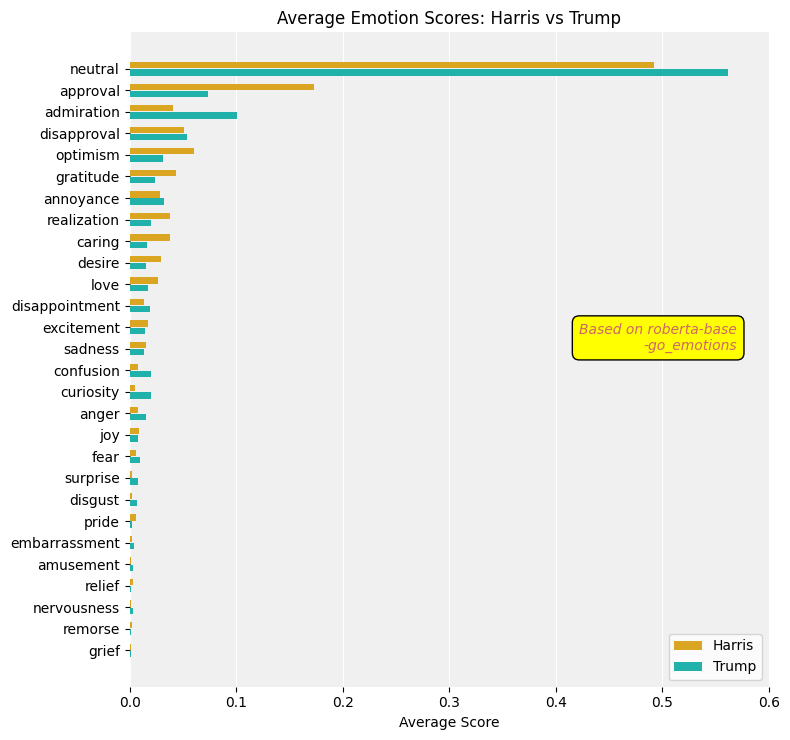

In [87]:
from transformers import pipeline
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# Initialize the emotion classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Define a function to compute average emotion scores for a text file
def get_average_emotions(filename):
    # Read the text file
    with open(filename, "r", encoding="utf-8", errors="replace") as file:
        text = file.read()
    
    # Split the text into sentences
    sentences = text.split(".")
    
    # Initialize a dictionary to tally emotion scores
    emotion_totals = defaultdict(float)
    num_sentences = len(sentences)
    
    # Analyze each sentence for emotions
    for sentence in sentences:
        if sentence.strip():  # Skip empty sentences
            model_output = classifier(sentence)
            for emotion_list in model_output:
                for emotion_data in emotion_list:
                    emotion_totals[emotion_data['label']] += emotion_data['score']
    
    # Calculate average scores
    emotion_averages = {emotion: total / num_sentences for emotion, total in emotion_totals.items()}
    return emotion_averages

# Calculate average emotions for both files
trump_emotions = get_average_emotions("trump.txt")
harris_emotions = get_average_emotions("harris.txt")

# Combine scores for sorting in descending order by combined scores
combined_scores = {emotion: harris_emotions.get(emotion, 0) + trump_emotions.get(emotion, 0) for emotion in set(harris_emotions) | set(trump_emotions)}
sorted_emotions = sorted(combined_scores.keys(), key=lambda x: combined_scores[x], reverse=True)

# Extract sorted scores
harris_scores = [harris_emotions.get(emotion, 0) for emotion in sorted_emotions]
trump_scores = [trump_emotions.get(emotion, 0) for emotion in sorted_emotions]

# Define the figure with increased height for better spacing
fig, ax = plt.subplots(figsize=(8, 7.5))
bar_height = 0.35  # Adjust height for each individual bar

# Increase spacing between each emotion by adding a multiplier
spacing_multiplier = 1.2  # Increase this for more space
y_pos_harris = np.arange(len(sorted_emotions)) * spacing_multiplier  # Harris on even positions
y_pos_trump = y_pos_harris + 0.4  # Trump on slightly offset positions for spacing

# Set background color and grid style
ax.set_facecolor('#f0f0f0')  # Light gray background
ax.grid(axis='x', color='white', linestyle='-', linewidth=0.7, zorder=1)  # White grid lines for x-axis

# Plot Harris bars with a higher zorder to appear on top of grid lines
ax.barh(y_pos_harris, harris_scores, color='goldenrod', height=bar_height, label='Harris', zorder=2)

# Plot Trump bars with a higher zorder to appear on top of grid lines
ax.barh(y_pos_trump, trump_scores, color='lightseagreen', height=bar_height, label='Trump', zorder=2)

# Add emotion labels only on the Harris bars, centered between Harris and Trump bars
ax.set_yticks(y_pos_harris + 0.2)  # Center the labels between Harris and Trump bars
ax.set_yticklabels(sorted_emotions)

# Set x-axis ticks at intervals of 0.1
ax.set_xticks(np.arange(0, max(max(harris_scores), max(trump_scores)) + 0.1, 0.1))

# Add labels and formatting
ax.set_xlabel('Average Score')
ax.set_title('Average Emotion Scores: Harris vs Trump')
ax.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Remove the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add a boxed annotation with yellow background
plt.text(
    0.95, 0.51, "Based on roberta-base\n-go_emotions", 
    ha='right', va='bottom', 
    transform=plt.gca().transAxes, 
    fontsize=10, color='#cf6767', style='italic',
    bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.5')
)

# Invert y-axis to show highest score at the top
ax.invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()


#### by group of 400 words
- better for context?

In [88]:
from transformers import pipeline, AutoTokenizer
from collections import defaultdict

# Initialize the emotion classifier and tokenizer
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")

# Read the document
with open("harris.txt", "r", encoding="utf-8", errors="replace") as file:
    text = file.read()

# Tokenize and create chunks
tokens = tokenizer(text, truncation=False)["input_ids"]

# Ensure each chunk is within the 512-token limit
max_length = 400  # Adjusted slightly under 512 to ensure no overflow
token_chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]

# Analyze each token chunk and aggregate results
emotion_totals = defaultdict(float)
num_chunks = len(token_chunks)

for token_chunk in token_chunks:
    # Convert tokens back to text for classification
    chunk_text = tokenizer.decode(token_chunk, skip_special_tokens=True)
    chunk_result = classifier(chunk_text)
    
    # Accumulate scores for each emotion in the nested list
    for emotion_dict in chunk_result:
        for emotion in emotion_dict:
            emotion_totals[emotion['label']] += emotion['score']

# Calculate average scores for each emotion
emotion_averages = {emotion: score / num_chunks for emotion, score in emotion_totals.items()}

# Print the average emotion scores
print("Average Emotions for the entire document:")
for emotion, avg_score in emotion_averages.items():
    print(f"{emotion}: {avg_score:.4f}")

/Users/delmelle/miniforge3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (3703 > 512). Running this sequence through the model will result in indexing errors


Average Emotions for the entire document:
gratitude: 0.1929
approval: 0.3802
neutral: 0.2298
optimism: 0.1119
love: 0.0590
realization: 0.0235
confusion: 0.0035
curiosity: 0.0034
admiration: 0.0547
annoyance: 0.0223
caring: 0.0475
desire: 0.0444
sadness: 0.0024
excitement: 0.0253
joy: 0.0086
relief: 0.0050
anger: 0.0049
disappointment: 0.0051
remorse: 0.0011
disapproval: 0.0565
surprise: 0.0012
disgust: 0.0014
fear: 0.0019
grief: 0.0008
pride: 0.0072
nervousness: 0.0012
amusement: 0.0007
embarrassment: 0.0006


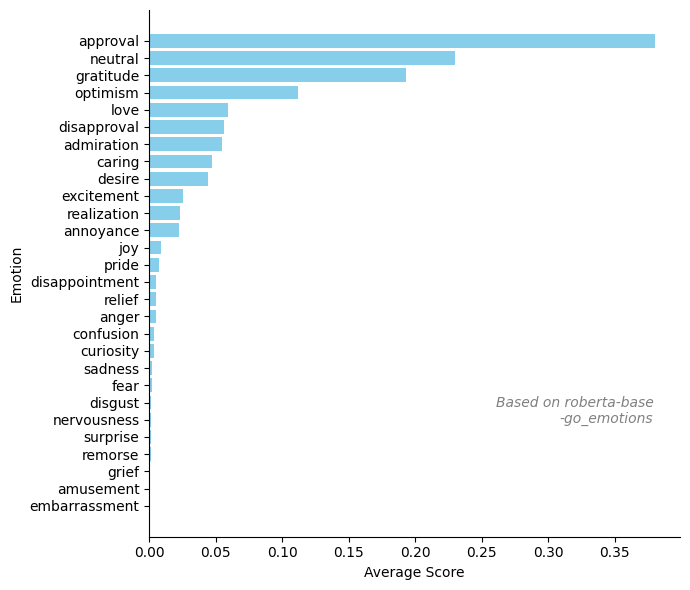

In [80]:
# Sort the emotions by average score in descending order
sorted_emotion_averages = dict(
    sorted(emotion_averages.items(), key=lambda item: item[1], reverse=True)
)

# Plotting the bar chart with horizontal bars
plt.figure(figsize=(7, 6))
plt.barh(list(sorted_emotion_averages.keys()), list(sorted_emotion_averages.values()), color='skyblue')
plt.title("")
plt.xlabel("Average Score")
plt.ylabel("Emotion")
plt.gca().invert_yaxis()  # Highest score at the top

# Remove the top and right spines (box edges)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.text(0.95, 0.21, "Based on roberta-base\n-go_emotions", ha='right', va='bottom', 
         transform=plt.gca().transAxes, fontsize=10, color='gray', style='italic')

# Display the plot
plt.tight_layout()
plt.show()


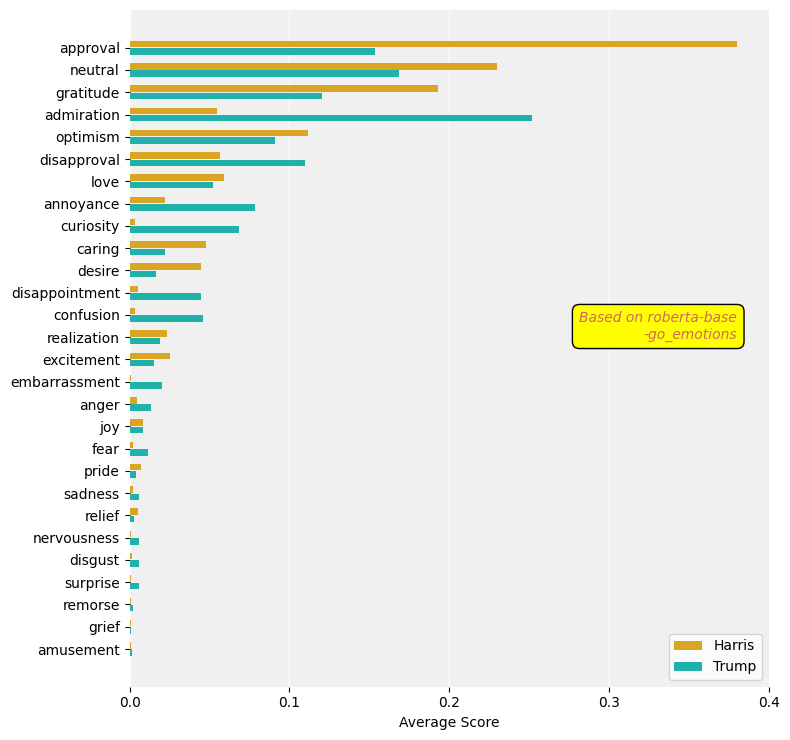

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Combine scores for sorting in descending order by combined scores
combined_scores = {emotion: harris_emotions[emotion] + trump_emotions[emotion] for emotion in harris_emotions}
sorted_emotions = sorted(combined_scores.keys(), key=lambda x: combined_scores[x], reverse=True)

# Extract sorted scores
harris_scores = [harris_emotions[emotion] for emotion in sorted_emotions]
trump_scores = [trump_emotions[emotion] for emotion in sorted_emotions]

# Define the figure with increased height for better spacing
fig, ax = plt.subplots(figsize=(8, 7.5))
bar_height = 0.35  # Adjust height for each individual bar

# Increase spacing between each emotion by adding a multiplier
spacing_multiplier = 1.2  # Increase this for more space
y_pos_harris = np.arange(len(sorted_emotions)) * spacing_multiplier  # Harris on even positions
y_pos_trump = y_pos_harris + 0.4  # Trump on slightly offset positions for spacing

# Set background color and grid style
ax.set_facecolor('#f0f0f0')  # Light gray background
ax.grid(axis='x', color='white', linestyle='-', linewidth=0.7, zorder=1)  # White grid lines for x-axis

# Plot Harris bars with a higher zorder to appear on top of grid lines
ax.barh(y_pos_harris, harris_scores, color='goldenrod', height=bar_height, label='Harris', zorder=2)

# Plot Trump bars with a higher zorder to appear on top of grid lines
ax.barh(y_pos_trump, trump_scores, color='lightseagreen', height=bar_height, label='Trump', zorder=2)

# Add emotion labels only on the Harris bars, centered between Harris and Trump bars
ax.set_yticks(y_pos_harris + 0.2)  # Center the labels between Harris and Trump bars
ax.set_yticklabels(sorted_emotions)

# Set x-axis ticks at intervals of 0.1
ax.set_xticks(np.arange(0, max(max(harris_scores), max(trump_scores)) + 0.1, 0.1))

# Add labels and formatting
ax.set_xlabel('Average Score')
ax.set_title('')
ax.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Remove the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add a boxed annotation with yellow background
plt.text(
    0.95, 0.51, "Based on roberta-base\n-go_emotions", 
    ha='right', va='bottom', 
    transform=plt.gca().transAxes, 
    fontsize=10, color='#cf6767', style='italic',
    bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.5')
)

# Invert y-axis to show highest score at the top
ax.invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()

Token indices sequence length is longer than the specified maximum sequence length for this model (13720 > 512). Running this sequence through the model will result in indexing errors


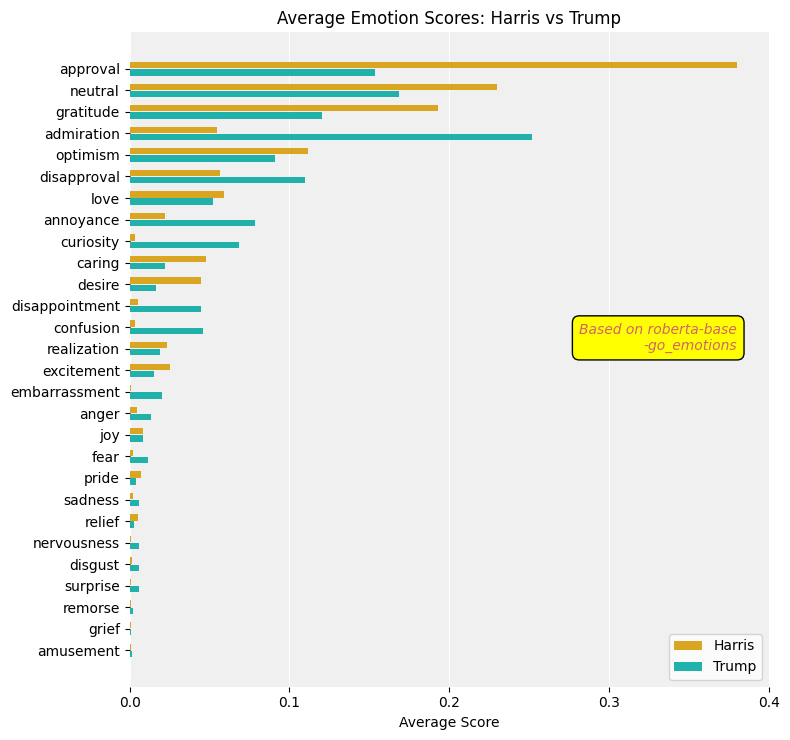

In [89]:
from transformers import pipeline, AutoTokenizer
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# Initialize the emotion classifier and tokenizer
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")

# Function to calculate average emotion scores for a file
def calculate_emotion_averages(filename):
    # Read the document
    with open(filename, "r", encoding="utf-8", errors="replace") as file:
        text = file.read()

    # Tokenize and create chunks
    tokens = tokenizer(text, truncation=False)["input_ids"]
    
    # Define chunk length
    max_length = 400  # Just under 512 tokens
    token_chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]
    
    # Analyze each token chunk and aggregate results
    emotion_totals = defaultdict(float)
    num_chunks = len(token_chunks)
    
    for token_chunk in token_chunks:
        # Convert tokens back to text for classification
        chunk_text = tokenizer.decode(token_chunk, skip_special_tokens=True)
        chunk_result = classifier(chunk_text)
        
        # Accumulate scores for each emotion in the nested list
        for emotion_dict in chunk_result:
            for emotion in emotion_dict:
                emotion_totals[emotion['label']] += emotion['score']
    
    # Calculate average scores for each emotion
    emotion_averages = {emotion: score / num_chunks for emotion, score in emotion_totals.items()}
    return emotion_averages

# Calculate emotion averages for both texts
trump_emotions = calculate_emotion_averages("trump.txt")
harris_emotions = calculate_emotion_averages("harris.txt")

# Combine scores for sorting in descending order by combined scores
combined_scores = {emotion: harris_emotions.get(emotion, 0) + trump_emotions.get(emotion, 0) for emotion in set(harris_emotions) | set(trump_emotions)}
sorted_emotions = sorted(combined_scores.keys(), key=lambda x: combined_scores[x], reverse=True)

# Extract sorted scores
harris_scores = [harris_emotions.get(emotion, 0) for emotion in sorted_emotions]
trump_scores = [trump_emotions.get(emotion, 0) for emotion in sorted_emotions]

# Define the figure with increased height for better spacing
fig, ax = plt.subplots(figsize=(8, 7.5))
bar_height = 0.35  # Adjust height for each individual bar

# Increase spacing between each emotion by adding a multiplier
spacing_multiplier = 1.2  # Increase this for more space
y_pos_harris = np.arange(len(sorted_emotions)) * spacing_multiplier  # Harris on even positions
y_pos_trump = y_pos_harris + 0.4  # Trump on slightly offset positions for spacing

# Set background color and grid style
ax.set_facecolor('#f0f0f0')  # Light gray background
ax.grid(axis='x', color='white', linestyle='-', linewidth=0.7, zorder=1)  # White grid lines for x-axis

# Plot Harris bars with a higher zorder to appear on top of grid lines
ax.barh(y_pos_harris, harris_scores, color='goldenrod', height=bar_height, label='Harris', zorder=2)

# Plot Trump bars with a higher zorder to appear on top of grid lines
ax.barh(y_pos_trump, trump_scores, color='lightseagreen', height=bar_height, label='Trump', zorder=2)

# Add emotion labels only on the Harris bars, centered between Harris and Trump bars
ax.set_yticks(y_pos_harris + 0.2)  # Center the labels between Harris and Trump bars
ax.set_yticklabels(sorted_emotions)

# Set x-axis ticks at intervals of 0.1
ax.set_xticks(np.arange(0, max(max(harris_scores), max(trump_scores)) + 0.1, 0.1))

# Add labels and formatting
ax.set_xlabel('Average Score')
ax.set_title('Average Emotion Scores: Harris vs Trump')
ax.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Remove the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add a boxed annotation with yellow background
plt.text(
    0.95, 0.51, "Based on roberta-base\n-go_emotions", 
    ha='right', va='bottom', 
    transform=plt.gca().transAxes, 
    fontsize=10, color='#cf6767', style='italic',
    bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.5')
)

# Invert y-axis to show highest score at the top
ax.invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()
